<a href="https://colab.research.google.com/github/snootchi/DATA-SCIENCE/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **`Welcome to Feature Engineering!`**<center>


In this assignment you'll learn about one of the most important steps on the way to building a great machine learning model: feature engineering.

What is a feature and why we need to engineer it? 

Basically, all machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristic to work properly.

Here, the need for feature engineering arises. 
With feature engineering, you'll learn how to:
- determine which features are the most important with mutual information
- invent new features in several real-world problem domains
- encode high-cardinality categoricals with a target encoding
- prepare the proper input dataset, compatible with the machine learning algorithm requirements
- improve the performance of machine learning models

### **`Significance of Feature Engineering`** 
According to a survey in Forbes, data scientists spend 80% of their time on data preparation. That's why we need feature engineering for extracting useful features from raw data using maths, statistics and domain knowledge.

The best way to achieve expertise is practicing different techniques on various datasets and observing their effect on model performances. So fellas, get ready to dive into various techniques of Feature Engineering.

**`PREDICTION OF BODY MASS INDEX`**

In this assignment, you have to predict te BMI i.e Body Mass Index based on thier gender, height, weight and index.

Throughout the Assignment, we'll be needing use of these 2 libraries, so let's import them first. 

In [113]:
# importing Pandas
import pandas as pd

# importing NumPy
import numpy as np


### 1. **`Feature Creation`**

<p style='text-align: right;'> 5 points</p>


Preprocessing is all about changing raw data into something that will help you improve the performance of your model. But you must be thinking how can we create own Feature and will it help increase the performance of my model ?

So, let's see what is actually meant by Feature Creation. You've a bank data and you're building a profit predictor model. You'll have all the values required like interest rate, revenue etc but what actually make sense is having Profit amount out of it as a core feature. 

So, here's where you'll require feature creation techniques where you can use calculations on existing features and add another column to your data.   

Here's the 500_Person_Gender_Height_Weight_Index dataset, let's see how feature creation is useful here. You can download this dataset from:

https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex

**Data Dict:**<br>
The dataset contains information about gender, height, weight and BMI index of individuals

**`Gender`** : Male / Female

**`Height`** : Number (cm)

**`Weight`** : Number (Kg)

**`Index`** :

0 - Extremely Weak,
1 - Weak,
2 - Normal,
3 - Overweight,
4 - Obesity,
5 - Extreme Obesity

In [114]:
# read data
data = pd.read_csv('/content/500_Person_Gender_Height_Weight_Index.csv')

#data.head()
data.head()


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


Lets create 2 new features in our data. One 'Height_meters' which will have height in meters instead of cm to get another feature named 'calculated_BMI', which will have BMI for each record

Don't worry if you don't remember BMI formula here we provide you

BMI = weight (kg) ÷ height2 (m)

**`Reference video to create new column:`**

File used: https://drive.google.com/file/d/1QSfTI2hE4cawIqVI6aVjS6nZSyAEKX4h/view?usp=sharing


In [116]:
# We need to calculate BMI which can be done using Height and Weight features
data['Height_meters'] = data['Height']*0.01
data['calculated_BMI'] = (data['Weight']/data['Height_meters'])

# print head of data
data


,Gender,Height,Weight,Index,Height_meters,calculated_BMI
0,Male,174,96,4,1.74,55.172414
1,Male,189,87,2,1.89,46.031746
2,Female,185,110,4,1.85,59.459459
3,Female,195,104,3,1.95,53.333333
4,Male,149,61,3,1.49,40.939597
...,...,...,...,...,...,...
495,Female,150,153,5,1.50,102.000000
496,Female,184,121,4,1.84,65.760870
497,Female,141,136,5,1.41,96.453901
498,Male,150,95,5,1.50,63.333333


Now we need to see some deviation from maximum height, minimum  height and average calculated BMI. So for this lets create separate 3 columns i.e. 'deviation_from_max_height', 'deviation_from_min_weight' and'deviation_from_avg_BMI'

Hint: you can use mean, median, max or min like stats to calculate.

In [117]:
data['deviation_from_max_height'] = data['Height']-data['Height'].max()
data['deviation_from_min_weight'] = data['Weight']-data['Weight'].min()

data['deviation_from_avg_BMI'] =  data['calculated_BMI']-data['calculated_BMI'].mean()

#See how it affected our data, print head of data

data.head()

,Gender,Height,Weight,Index,Height_meters,calculated_BMI,deviation_from_max_height,deviation_from_min_weight,deviation_from_avg_BMI
0,Male,174,96,4,1.74,55.172414,-25,46,-7.793222
1,Male,189,87,2,1.89,46.031746,-10,37,-16.933890
2,Female,185,110,4,1.85,59.459459,-14,60,-3.506176
3,Female,195,104,3,1.95,53.333333,-4,54,-9.632303
4,Male,149,61,3,1.49,40.939597,-50,11,-22.026039


Alright, as you have understood how important feature engineering is, so now we'll be using Kaggle's "Titanic - Machine learning from Disaster" dataset for performing next some of the feature engineering techniques, you can find its link below:

https://www.kaggle.com/c/titanic/data

In [118]:
# read train csv data
data = pd.read_csv('/content/train.csv')

# print head

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
data.shape

(891, 12)

In [120]:
# drop cols which have more than 70% null values using thresh parameter
d1= data.dropna(thresh=int(data.shape[0]*.7),axis=1)
d1.shape

(891, 11)

### 2. **`Imputation`**

<p style='text-align: right;'> 10 points</p>


The most common problem you will encounter when you try to prepare your data for machine learning is about missing values which do affect the performance of your machine learning model. The reason for the missing values can be human errors, interruptions in the data flow, privacy concerns, and so on. 

The most simple solution to the missing values one can think about is to drop the rows or the entire column. There is not an optimum threshold for dropping but you can use 70% as an example value and try to drop the rows and columns which have missing values with higher than this threshold.

Reference video to drop null values: 

In [121]:
threshold = 0.7
#filter columns with mean missing value higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

#print data
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [122]:
#filter rows with mean missing value rate higher than threshold

data = data.dropna(axis=0 , thresh=threshold)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Fun fact for you geeky!

You can also use dropna with thresh parameter set as 70% of data size to do this

Reference: 

**`Reference video for dropna`**

File used: https://drive.google.com/file/d/1lQEqBybd6q5opFnVHVEojmmzhfBDzWX4/view?usp=sharing

Now, as you can observe that 'cabin' column from the data is dropped. But that's not it, there're still cloulmns where there are NaN values which we need to take care of.

Interesting right? Let's see what else we can do ahead.

In [124]:
# check null counts in each column

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### **`But What is Imputation ?`**
This answer lies itself in its definition which basically justifies why do we need it as well:

' The assignment of a value to something by inference from the value of the products or processes to which it contributes '

#### **`Numerical Imputation`**
Imputation is a more preferable option rather than dropping because it preserves the data size. However, there is an important selection of what you impute to the missing values. We suggest beginning with considering a possible default value of missing values in the column. For example, if you have a column that only has 1 and NA, then it is likely that the NA rows correspond to 0. For another example, if you have a column that shows the “customer visit count in last month”, the missing values might be replaced with 0 as long as you think it is a sensible solution.

Another reason for the missing values is joining tables with different sizes and in this case, imputing 0 might be reasonable as well.
Except for the case of having a default value for missing values, I think the best imputation way is to use the medians of the columns. As the averages of the columns are sensitive to the outlier values, while medians are more solid in this respect.

Let's see this with respect to the example of Age column of our data.

Reference video to fill nan with mean: 

Note: But you can use median instead of mean

**`Reference video for fillna`**

File used: https://drive.google.com/file/d/1OLFTE9UfN6AhF1OuEdvYcFj4m1A6T-O-/view?usp=sharing

In [126]:
# Filling missing values with medians of Age column
data['Age'] = data['Age'].fillna(data['Age'].median())

# print head of data
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [127]:
# Check again total number of nan in each feature
data.isnull().sum()



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Observed something strange ?

Yes, Embarked column still has 2 null values but how do we deal with such categorical imputations ?

#### **`Categorical Imputation`**
Replacing the missing values with the maximum occurred value in a column is a good option as well for handling categorical columns. But if you think the values in the column are distributed uniformly and there is not a dominant value, imputing a category like “Other” might be more sensible, because in such a case, your imputation is likely to converge a random selection.


**`Reference video for handling missing values in categorical data`**

File used: https://drive.google.com/file/d/1rBF57SWnp5hsJtwlffXRZ513tV5Bm8hI/view?usp=sharing

dataset: https://drive.google.com/file/d/1jEza5qWDgal1VUcuWV-_-q8nmrkpXRrB/view?usp=sharing

In [129]:
new_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [130]:
# lets impute nan in column Embarked with maximum occured values in it. 
data['Embarked'] = data['Embarked'].fillna('S') #cause data['Embarked'].mode()==S


#check total count of nan again in each feature
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Well done! Now our data does not have any missing values

### **`3.Handling Outliers`**

<p style='text-align: right;'> 30 points</p>

Before mentioning how outliers can be handled, We want you to know that the best way to detect the outliers is to demonstrate the data visually. All other statistical methodologies are open to making mistakes, whereas visualizing the outliers gives a chance to take a decision with high precision. 

Statistical methodologies are less precise, but on the other hand, they have a superiority, they are fast. Here you'll learn two different ways of handling outliers. These will detect them using standard deviation, and percentiles.

#### **`Outlier Detection with Standard Deviation`**
If a value has a distance to the average higher than x * standard deviation, it can be assumed as an outlier. Then what x should be?
There is no trivial solution for x, but usually, a value between 2 and 4 seems practical.


Reference video: 

**`Reference video for outlier detection and removal using standard deviation and zscore`**

File used: https://drive.google.com/file/d/18huTkwcAHdo2HkfWVWbywLBzVEK8eqoC/view?usp=sharing

dataset: https://drive.google.com/file/d/1L_8YIrBHELXq8GtXYOeteY-RYovBV4iZ/view?usp=sharing

In [131]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://www.youtube.com/watch?v=1mxM_LJzK2g&list=PLsR_0x6BuM-GpC1Dzjt1WDWCs0FPSSGQd&index=7&ab_channel=cloudyML',width=700, height=400)

In [132]:
#We will need same data for other techniques as well so better we leave originial undisturbed by copying it into new_data
new_data = pd.read_csv('/content/train.csv')


# Lets define our factor=3 as our factor to calculate our limit
factor = 3

# Calculate upper limit and lower limit  of 'Fare' column to decide the threshold to detect outlier
#Hint use: upper_lim=mean+std*factor
#          loeer_lim=mean-std*factor

upper_lim = new_data['Fare'].mean() + (new_data['Fare'].std()*factor)
lower_lim = new_data['Fare'].mean() -(new_data['Fare'].std()*factor)

In [133]:
#Now filter our 'Fare' with data lower than upper_lim and greater than lower_lim
new_data1 = data[(data['Fare'] < upper_lim) |(data['Fare'] > lower_lim)]

#print the length of original and new data
print('Length of original data : ',  len(new_data))
print('Length of new data : ' , len(new_data1))


Length of original data :  891
Length of new data :  891


In addition, z-score can be used instead of the formula above. Z-score (or standard score) standardizes the distance between a value and the mean using the standard deviation.

We hope you have already learned z-score technique in our Data cleaning assignment.

#### **`Outlier Detection with Percentiles`**
Another mathematical method to detect outliers is to use percentiles. You can assume a certain percent of the value from the top or the bottom as an outlier. The key point is here to set the percentage value once again, and this depends on the distribution of your data as mentioned earlier.

Additionally, a common mistake is using the percentiles according to the range of the data. In other words, if your data ranges from 0 to 100, your top 5% is not the values between 96 and 100. Top 5% means here the values that are out of the 95th percentile of data.

Refrence video: 

**`Reference video for outlier detection and removal using pandas`**

File used: https://drive.google.com/file/d/1z7HqhisA9qDUObFJXdKO9FA1w8Tzh4Wd/view?usp=sharing


In [135]:
#copy data again into new_data
new_data = pd.read_csv('/content/train.csv')

#create upper and lower limits for column 'Fare' based on 95% and 5% respectively.
upper_lim = new_data['Fare'].quantile(0.95)
lower_lim = new_data['Fare'].quantile(0.05)

#Dropping the outlier rows in 'Fare' with your created limited.
new_data2 = new_data[(new_data['Fare'] <= upper_lim) & (new_data['Fare'] >= lower_lim)]
#print the length of both original and new data after filter
print("The length of original data " , len(new_data))
print("The length of new data " , len(new_data2))

The length of original data  891
The length of new data  803


#### **`An Outlier Dilemma: Drop or Cap`**
Another option for handling outliers is to cap them instead of dropping. So you can keep your data size and at the end of the day, it might be better for the final model performance.
On the other hand, capping can affect the distribution of the data, thus it better not to exaggerate it.

Reference link: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers 
 
    Note: check Quantile-based Flooring and Capping section in given link


### **`4. Scaling`**

<p style='text-align: right;'> 40 points</p>


In most cases, the numerical features of the dataset do not have a certain range and they differ from each other. In real life, it is nonsense to expect age and Ticket Fare columns to have the same range. But from the machine learning point of view, how these two columns can be compared?

Scaling solves this problem. The continuous features become identical in terms of the range, after a scaling process. This process is not mandatory for many algorithms, but it might be still nice to apply.

Basically, there are two common ways of scaling:

#### **`1. Normalization`** 
Xnorm = (X - Xmin) / (Xmax - Xmin) 

Normalization scales all values in a fixed range between 0 and 1. This transformation does not change the distribution of the feature and due to the decreased standard deviations, the effects of the outliers increases. Therefore, before normalization, it is recommended to handle the outliers.

**`Reference video for data preprocessing`**

File used: https://drive.google.com/file/d/1ZFyL_--2tJLpfNng42kYbLR4oMG4sgZK/view?usp=sharing

dataset: https://drive.google.com/file/d/1jNz7UZPNfWyAHlCa-rLQ28JV8SHzv0-t/view?usp=sharing


In [136]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://www.youtube.com/watch?v=EF_zSwCPcpk&list=PLsR_0x6BuM-GpC1Dzjt1WDWCs0FPSSGQd&index=10&ab_channel=cloudyML',width=700, height=400)


In [137]:
max(new_data['Age']) - new_data['Age']

0      58.0
1      42.0
2      54.0
3      45.0
4      45.0
       ... 
886    53.0
887    61.0
888     NaN
889    54.0
890    48.0
Name: Age, Length: 891, dtype: float64

In [138]:
# copy the data into new_data
new_data = pd.read_csv('/content/train.csv')
agemax = max(new_data['Age'])
agemin = min(new_data['Age'])
faremax = max(new_data['Fare'])
faremin = min(new_data['Fare'])
#Normalizing the Age column using the given formula 
new_data['Age'] = (new_data['Age'] - agemin) / (agemax - agemin)

#Normalizing the Fare column using the given formula
new_data['Fare'] = (new_data['Fare'] - faremin) / (faremax - faremin)

# print head
new_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,NaN,S


#### **`2. Standardization`**
Z = (X - Xmean) / sigma ; where sigma = standard deviation

Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

In [139]:
# copy the data into new_data
from sklearn.preprocessing import StandardScaler
new_data = pd.read_csv('/content/train.csv')
scaler = StandardScaler()
#Standardizing the Age column using the Z formula given above
print(scaler.fit(new_data[['Age']]))
new_data['Age'] = scaler.fit_transform(new_data[['Age']])

#Standardizing the Fare column  using the Z formula given above
print(scaler.fit(new_data[['Fare']]))
new_data['Fare'] = scaler.fit_transform(new_data[['Fare']])

# print head of new_data
new_data.head()


StandardScaler()
StandardScaler()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,1,0,A/5 21171,-0.502445,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,1,0,PC 17599,0.786845,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1,0,113803,0.420730,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,0,0,373450,-0.486337,NaN,S


We have used formula of both the techniques, so that you get logic behind there implimentation. 

But good thing to know for you is that scikit learn already has library to scale the data with your choice of technique. Nice Right?

### **`5. Binning`**

<p style='text-align: right;'> 15 points</p>


Data binning is a data pre-processing method used to minimize the effects of small observation errors. Binning is done to create bins for continuous variables where they are converted to categorical variables. 

The original data values are divided into small intervals known as bins and then they are replaced by a general value calculated for that bin. This has a smoothing effect on the input data and may also reduce the chances of overfitting in case of small datasets.


We performed Binning for numerical age data so that we can prevent overfitting of model and rather deal this column as a categorial feature. It was observed that grouping into age groups improved the model performance, so sometimes in such cases grouping make more sense instead of using continuous numerical distribution for your model

Reference video :

**`Reference video for binning`**

File used: https://drive.google.com/file/d/1lhRopaxm0woKK0twbPpu8OnD1dl9Coqp/view?usp=sharing

dataset: https://drive.google.com/file/d/1mNPKdc0KcRdA4MOLzqTD6Rcfl8gVlZp4/view?usp=sharing

In [141]:
# copy the data into new_data
new_data = pd.read_csv('/content/train.csv')
bins=[0,18,40,100]
label =["Children", "Adult" ,"Old"]
# Impliment binning on Age and make another column names Age_group with  bins=[0,18,40,100] and label them as "Children", "Adult" and"Old"
new_data['Age_group'] = pd.cut(new_data['Age'] , labels=label , bins=bins) 

#count total values of each category
new_data['Age_group'].value_counts()


Adult       425
Old         150
Children    139
Name: Age_group, dtype: int64

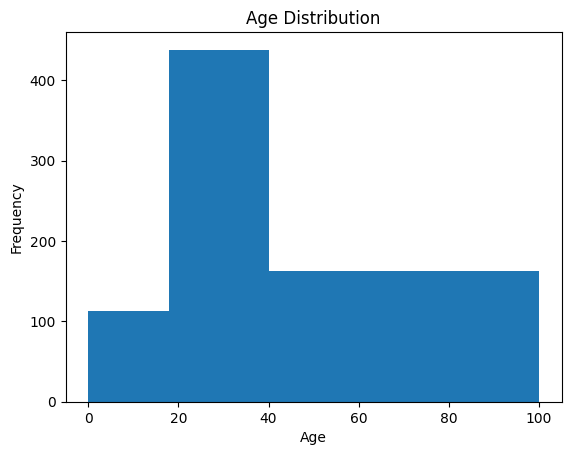

In [142]:
#Checking 'Age_group' distribution
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(new_data['Age'], bins=bins)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Show the plot
plt.show()



###Observation:
It represents the distribution of a continuous variable over a given interval or period of time.



### **`6. Encoding Categorical Variables`**

<p style='text-align: right;'> 40 points</p>


Some algorithms can work with categorical data directly.

For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation).

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.

This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.

Reference video: 

**`Reference video for encoding categorical data`**

File used: https://drive.google.com/file/d/1vr4p6k9l4QvKrEgkYdl5G6hJZsU8o9pc/view?usp=sharing


In [144]:
# Count unique value counts for both the columns.
new_data['Sex'].value_counts() , new_data['Embarked'].value_counts()







(male      577
 female    314
 Name: Sex, dtype: int64,
 S    644
 C    168
 Q     77
 Name: Embarked, dtype: int64)

You can see that Sex are having 2 categories and Embarked has 3 categories.

Let's use encoding on both the columns 


Feature Encoding can be done using two steps:

    1. Integer Encoding
    2. One-Hot Encoding

Let's Implement both the techniques.

**1. Integer encoding**

Integer encoding (also known as label encoding) includes replacing the categories with digits from 1 to n (or 0 to n-1, depending on the implementation), where n is the number of the variable’s distinct categories (the cardinality), and these numbers are assigned arbitrarily.

For example, “red” is 1, “green” is 2, and “blue” is 3.

Using sci-kit learn library we will import LabelEncoder to do this on Sex column


In [145]:
# Import Label encoder
from sklearn.preprocessing import LabelEncoder


# creating instance of labelencoder
labelencoder = LabelEncoder()


# Assigning numerical values in column Sex and storing in another column named Sex_encode
new_data['Sex_encode'] = labelencoder.fit_transform(new_data['Sex'])


#print data.head()
new_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Sex_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


Hey buddy. Did you see? male is encoded as 1 and female as 0

Lets check One-Hot Encoding technique

**2. One-Hot Encoding**

Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

Hey Intellipath! A fun fact! 
    
    The binary variables are often called “dummy variables” in other fields, such as statistics. Even we will be using pandas get_dummy function to do one hot encoding

Let’s consider column Embarked to do this



In [146]:
#Using get_dummies function encode and concat encoded features in data
data= pd.get_dummies(new_data['Embarked'])


#data.head()
new_data = pd.concat([new_data , data],axis='columns')
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Sex_encode,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1,0,0,1


Columns C, Q and S are one hot encoded features

Wohoo! great job smarty! Did you see your last 4 columns are binary encoded out of  Sex and Embarked features.



### **`7. Variable Transformation`**

<p style='text-align: right;'> 15+15+15+15 = 60 points</p>


Some machine learning models, like linear and logistic regression, assume that the variables follow a normal distribution. More likely, variables in real datasets will follow more a skewed distribution.

By applying a number of transformations to these variables, and mapping their skewed distribution to a normal distribution, we can increase the performance of our models.

![image.png](attachment:image.png)

#### How can we transform variables?
The most commonly-used methods to transform variables are the following:
- Logarithmic transformation
- Square root transformation
- Reciprocal transformation
- Exponential or power transformation


Reference video: 

**`Reference video for transformation to better fit gaussian`**

File used: https://drive.google.com/file/d/1o-YJvWCNyD7ofIFs0lOzvkN4SiYobUwm/view?usp=sharing

dataset: https://drive.google.com/file/d/1k-qx3ot3l1p8ZPGakVEzriGN4QM03lEz/view?usp=sharing

#### **`1. Logarithmic transformation [ f(x) = ln(x) ]`**

This is the simplest and most popular among the different types of transformations and involves a substantial transformation that significantly affects distribution shape.

We can use it (natural logarithmic ln or log base 10) to make extremely skewed distributions less skewed, especially for right-skewed distributions.

You should note that this function is defined only for strictly positive numbers.

For understanding Logarithmic transformation, let's us see the example of kc-House-data whose link you can find here.

https://www.kaggle.com/shivachandel/kc-house-data

Text(0.5, 1.0, 'Price vs Number of houses')

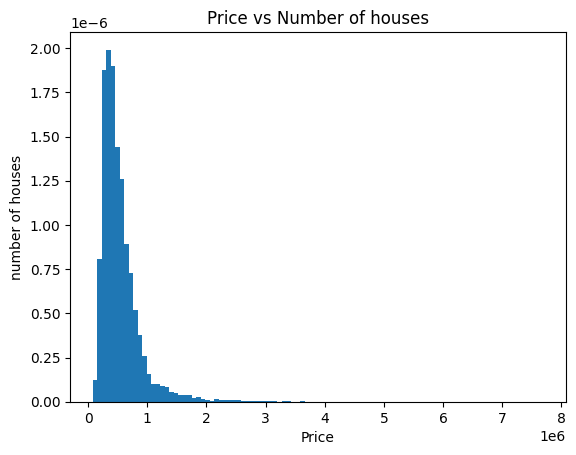

In [148]:
# import pyplot


#reading the data into variable new_data
new_data = pd.read_csv('/content/kc_house_data.csv')

#plot price histogram

# Create a histogram of the Price column
# Create a histogram of the Price column
plt.hist(new_data['price'], bins=100 , density=True)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('number of houses')
plt.title('Price vs Number of houses')


##Observation:
1. It represents the distribution of a continuous variable over a given interval or period of time.
2. It was plotted on number of houses on y axis and price on x axis.

Lets apply log transform on price column and plot its distribution

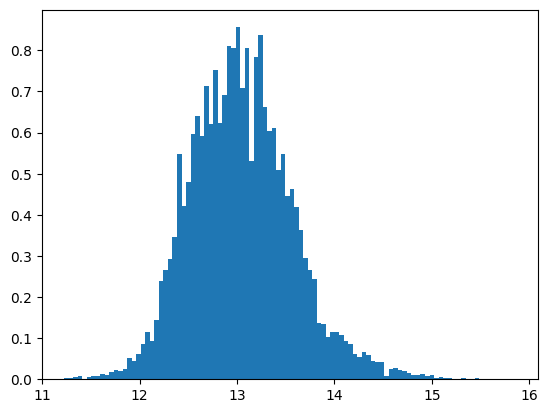

In [149]:

log_price = np.log(new_data['price'])
plt.hist(log_price, bins=100 , density=True)
plt.show()

###Observation
You have seen the difference between non transormed and transformed Price data.


#### **`2. Square root transformation [ f(x) = √x ]`**

Another simple transformation, this one has an average effect on distribution shape: it’s weaker than logarithmic transformation, and it’s also used for reducing right-skewed distributions.

One particular advantage of square root transformation is that you can apply it to zero values.

You should note that this function is defined only for positive numbers.

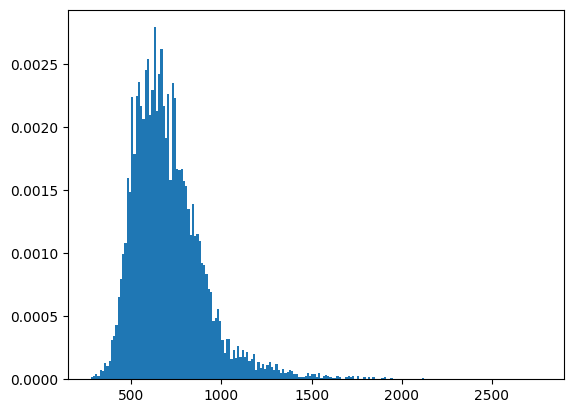

In [150]:
#square root tranform and its distribution
sqrt_price = np.sqrt(new_data['price'])
plt.hist(sqrt_price , bins=200 , density=True)
plt.show()

###observation
Square root transformation is actually weaker than log transformation

#### **`3. Reciprocal transformation [ f(x) = 1/x ]`**

The reciprocal transformation is a powerful transformation with a radical effect. The reciprocal reverses the order among values of the same sign, so large values become smaller. The negative reciprocal preserves the order among values of the same sign.

You should note that this function is not defined for zero.

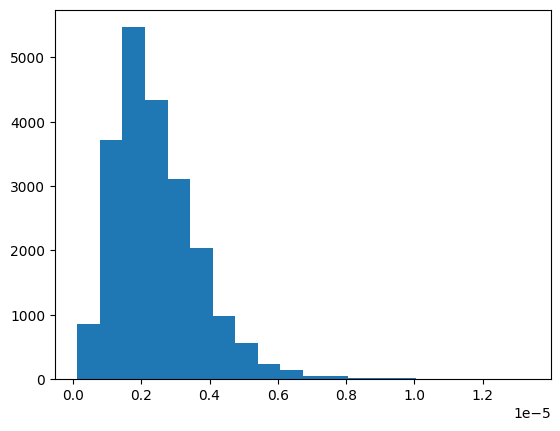

In [151]:
#reciprocal transformation and its plot

rec_price = 1/new_data['price']

# Create a histogram of the transformed values
plt.hist(rec_price, bins=20)
plt.show()

#### **`4. Exponential or Power transformation [ f(x) = x^n or f(x) = e^x ]`**

Power transformation has a reasonable effect on distribution shape; generally, we apply power transformation (power of two usually) to reduce left skewness.

You can use any exponent in this transformation; you can even use the exp() function. Try and see which one gives you better results.

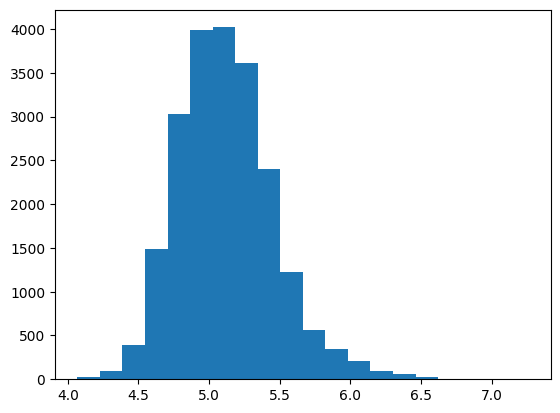

In [152]:
#hint: the below output is when we took exponenent value as 1/8. You can try and check your own value also.
exp_price = (new_data['price'])**(1/8)
plt.hist(exp_price , bins = 20)
plt.show()


### **`8. Date and Time Engineering`**

Reference link for date formate:https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
Reference link for datetime related objects:https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.weekday.html

<p style='text-align: right;'> 10 points</p>


Though date columns usually provide valuable information about the model target, they are neglected as an input or used nonsensically for the machine learning algorithms. It might be the reason for this, that dates can be present in numerous formats, which make it hard to understand by algorithms, even they are simplified to a format like "01–01–2021".

Building an ordinal relationship between the values is very challenging for a machine learning algorithm if you leave the date columns without manipulation. Here, we'll do three types of preprocessing for dates:
- Extracting the parts of the date into different columns: Year, month, day, etc.
- Extracting the time period between the current date and columns in terms of years, months, days, etc.
- Extracting some specific features from the date: Name of the weekday, Weekend or not, holiday or not, etc.

If you transform the date column into the extracted columns like above, the information of them become disclosed and machine learning algorithms can easily understand them.

Now let's understand this using real example of "International football results from 1872 to 2020" dataset :

https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

Reference video: 


**`Reference video for transformation to date time engineering`**

File used: https://drive.google.com/file/d/1mGW1iY8Tq1yziJXq8W2bCWkaN6hB9p0w/view?usp=sharing



In [153]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://www.youtube.com/watch?v=xsgBbHw2_dQ&list=PLsR_0x6BuM-GpC1Dzjt1WDWCs0FPSSGQd&index=3&ab_channel=cloudyML',width=700, height=400)

In [154]:
# importing datetime
import datetime



In [155]:
#read results.csv
data = pd.read_csv('/content/goalscorers.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41008 entries, 0 to 41007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       41008 non-null  object 
 1   home_team  41008 non-null  object 
 2   away_team  41008 non-null  object 
 3   team       41008 non-null  object 
 4   scorer     40959 non-null  object 
 5   minute     40750 non-null  float64
 6   own_goal   41008 non-null  bool   
 7   penalty    41008 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.0+ MB


In [156]:
my_series_str = data['date'].to_string(index=False)
my_series_str = my_series_str.split('\n')

In [157]:
#Transform string to date of format "%Y-%m-%d"
dtt = pd.to_datetime(my_series_str,format='%Y-%m-%d')


data['date'] = dtt

In [158]:
#Extracting Year from date
data['year'] = data['date'].dt.year
data['year']

0        1916
1        1916
2        1916
3        1916
4        1916
         ... 
41003    2022
41004    2022
41005    2022
41006    2022
41007    2022
Name: year, Length: 41008, dtype: int64

In [159]:
#Extracting Month from date
data['month'] = data['date'].dt.month


In [160]:
#Extracting passed years since the current date
from datetime import datetime
current_date = datetime.now()
data['years_passed'] = (current_date - data['date']).dt.days / 365.25

In [161]:
#Extracting passed months since the current date
data['passed_months'] = (current_date - data['date']).dt.days / 30.44



In [162]:
#Extracting the weekday name from date
data['day_name'] = data['date'].dt.strftime('%A')


In [163]:
# Lets check data head for your engineered features
data.head()



,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year,month,years_passed,passed_months,day_name
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,1916,7,106.861054,1282.227332,Sunday
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,1916,7,106.861054,1282.227332,Sunday
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,1916,7,106.861054,1282.227332,Sunday
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,1916,7,106.861054,1282.227332,Sunday
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,1916,7,106.850103,1282.095926,Thursday


In [164]:
# check value counts in day_name column
data['day_name'].value_counts()



Wednesday    10140
Sunday        9128
Saturday      7900
Tuesday       4521
Friday        3904
Thursday      3206
Monday        2209
Name: day_name, dtype: int64

From above you can see that most of the International footbal tournament were on sunday. Such small small analysis becomes usefull for our machine learning problems to solve.

All these feature engineering techniques becomes very important to bring good insights and results for any machine learning problems, hence we hope that you understand the importance of feature engineering as part of data science.

## **`Summary`**

We learnt how to invent new features in several real-world problem domains, fixing numerical-categorical missing values, 
encode high-cardinality categoricals with a target encoding, transforming variables when needed and how to handle date time feature. 

## **`Conculsion:`**<br>
1. Feature engineering is the development of new data features from raw data. With this technique, it analyze the raw data and potential information in order to extract a new or more valuable set of features. 
2. Feature engineering can be seen as a generalization of mathematical optimization that allows for better analysis.





# FeedBack
We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

Please fill this feedback form https://docs.google.com/forms/d/e/1FAIpQLSfjBmH0yJSSA34IhSVx4h2eDMgOAeG4Dk-yHid__NMTk3Hq5g/viewform